In [23]:
import pandas as pd
df = pd.read_csv('streamflix_user_data_15000.csv')
df.head()

,User ID,Registration Date,Current Subscription Status,Date of Premium Subscription,Number of Videos Watched,Total Watch Time,Primary Device,Age Group,Country,Favorite Genre,Number of Customer Support Interactions,Net Promoter Score,Engagement Trend,Social Shares
0,1001,2023-09-19,Premium,2023-09-23,96,138.7,Desktop,45-54,Brazil,Sci-Fi,1,8,Decreasing,3
1,1002,2023-09-27,Premium,2023-09-30,63,79.4,Mobile,18-24,USA,Comedy,3,4,Increasing,2
2,1003,2023-05-10,Premium,2023-06-07,46,55.4,Desktop,25-34,Canada,Comedy,3,5,Stable,0
3,1004,2023-09-05,Premium,2023-09-07,87,72.9,Mobile,25-34,Spain,Comedy,3,6,Increasing,3
4,1005,2023-05-24,Premium,2023-06-18,121,118.4,Tablet,25-34,Canada,Romance,5,3,Increasing,4


In [24]:
# Convert date field columns to datetime for further analysis
date_columns = ['Registration Date', 'Date of Premium Subscription']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

df.set_index('User ID', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 1001 to 16000
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Registration Date                        15000 non-null  datetime64[ns]
 1   Current Subscription Status              15000 non-null  object        
 2   Date of Premium Subscription             11072 non-null  datetime64[ns]
 3   Number of Videos Watched                 15000 non-null  int64         
 4   Total Watch Time                         15000 non-null  float64       
 5   Primary Device                           15000 non-null  object        
 6   Age Group                                15000 non-null  object        
 7   Country                                  15000 non-null  object        
 8   Favorite Genre                           15000 non-null  object        
 9   Number of Customer Support Interactions  

#### Data Preprocessing

All columns have 15000 `non-null` values except the `Date of Premium Subscription`.<br>
We need to insure that these missing values are related to our **free-tier** users.

In [25]:
# Count records representing users with Premium tier and missing Date of Premium Subscription 
n_missing = sum(1 for _, row in df.iterrows() if row['Current Subscription Status'] == 'Premium' and row['Date of Premium Subscription'] is None)
n_missing

0

### Adding Derived Columns for Analysis

#### Adding "Days to Premium"
This calculates the number of days between registration and premium subscription.

```python
days_to_premium = df['Date of Premium Subscription'] - df['Registration Date']
```


In [26]:
# Add Days to Premium for further analysis

days_to_premium = df['Date of Premium Subscription'] - df['Registration Date']

days_to_premium_index = df.columns.get_loc('Date of Premium Subscription') + 1
df.insert(days_to_premium_index,'Days to Premium', days_to_premium.apply(lambda x: x.days))

### Quick Review on the data

In [27]:
# First, select only numeric columns from the DataFrame
review_columns = df.select_dtypes(include=['number']).columns

# Calculate summary statistics
review_grouped = df.groupby('Current Subscription Status')[review_columns].agg(['mean', 'median', 'std', 'min', 'max'])

review_grouped = review_grouped.transpose() #Make it more readable

current_conversion_rate = df[df['Current Subscription Status'] == 'Premium'].shape[0] / df.shape[0]
print(f'Current Converstion Rate: {current_conversion_rate}')

review_grouped


Current Converstion Rate: 0.7381333333333333


Current Subscription Status                           Free     Premium
Days to Premium                         mean           NaN   14.330925
                                        median         NaN   14.000000
                                        std            NaN    8.784216
                                        min            NaN    1.000000
                                        max            NaN   30.000000
Number of Videos Watched                mean     60.714104   71.291817
                                        median   56.000000   68.000000
                                        std      38.451316   36.369145
                                        min       1.000000    1.000000
                                        max     209.000000  216.000000
Total Watch Time                        mean     73.964257   86.542531
                                        median   68.050000   81.100000
                                        std      48.092136   45.812421
                                        min       0.100000    0.100000
                                        max     275.600000  292.400000
Number of Customer Support Interactions mean      2.464358    2.500813
                                        median    2.000000    2.000000
                                        std       1.712684    1.694860
                                        min       0.000000    0.000000
                                        max       5.000000    5.000000
Net Promoter Score                      mean      3.018330    6.009393
                                        median    2.000000    6.000000
                                        std       2.914217    2.031035
                                        min       0.000000    2.000000
                                        max      10.000000   10.000000
Social Shares                           mean      1.352088    1.614613
                                        median    1.000000    1.000000
                                        std       1.426232    1.442436
                                        min       0.000000    0.000000
                                        max       8.000000    9.000000

### Quick Analysis Report

#### Observations:

**Days to Premium**
- **Premium Users**: On average, users take about 2 weeks to convert to premium.

**Additional Insight:**
- The minimum days to premium is 1 and the maximum is 30 days. This means that users decide within this time frame whether the free features are sufficient or not.
- Therefore, it's crucial to focus on users who registered 30 days before. **_This is VERY IMPORTANT._**


**Number of Videos Watched**
- **Free Users**: Watch around 60.71 videos on average, with a wide range from 1 to 209 videos, indicating varied engagement levels.
- **Premium Users**: Higher average at 71.29 videos, ranging from 1 to 216, suggesting increased engagement among premium users but the same

**Total Watch Time**
- **Free Users**: Average watch time is 73.96 hours, with significant variability (0.1 to 275.6 hours).
- **Premium Users**: Higher average watch time of 86.54 hours, ranging from 0.1 to 292.4 hours, indicating premium users are more engaged.

**Customer Support Interactions**
- Both **Free** and **Premium Users**: Average around 2.5 interactions, showing consistent engagement with customer support across user types.

**Net Promoter Score (NPS)**
- **Free Users**: Lower average NPS of 3.02, reflecting less satisfaction.
- **Premium Users**: Higher average NPS of 6.01, indicating better satisfaction and likelihood to recommend.

**Social Shares**
- **Free Users**: Average 1.35 social shares.
- **Premium Users**: Slightly higher at 1.61, suggesting premium users are more likely to share content on social media.


In [28]:
from itertools import combinations

threshold = 0.9
corr_matrix = df.select_dtypes(include=['number']).corr()

highly_correlated_columns = [(col1, col2) for col1, col2 in combinations(corr_matrix.columns, 2) 
                             if abs(corr_matrix.loc[col1, col2]) >= threshold]


print(f'highly correlated columns: {highly_correlated_columns}')
corr_matrix


highly correlated columns: [('Number of Videos Watched', 'Total Watch Time')]


,Days to Premium,Number of Videos Watched,Total Watch Time,Number of Customer Support Interactions,Net Promoter Score,Social Shares
Days to Premium,1.000000,-0.001393,-0.004103,0.003628,-0.003845,0.002631
Number of Videos Watched,-0.001393,1.000000,0.938492,0.000542,0.060636,0.756281
Total Watch Time,-0.004103,0.938492,1.000000,0.005996,0.050494,0.710752
Number of Customer Support Interactions,0.003628,0.000542,0.005996,1.000000,-0.591904,0.002271
Net Promoter Score,-0.003845,0.060636,0.050494,-0.591904,1.000000,0.037949
Social Shares,0.002631,0.756281,0.710752,0.002271,0.037949,1.000000


### Highly Correlated Columns

- The difference between the columns `[('Number of Videos Watched', 'Total Watch Time')]` is negligible in most analyses.
- `Social Shares` increase with the `Number of Videos Watched`.
- Customers with more Support Interactions tend to be less satisfied with the product.
  - This could be due to their experience with the support team or recurring application issues.

### Additional Insights

- Based on the correlation analysis, the columns `[('Number of Videos Watched', 'Total Watch Time')]` exhibit a high correlation of approximately 0.94. 
  - This indicates that these features provide similar information, suggesting that one could potentially be redundant in some analyses.


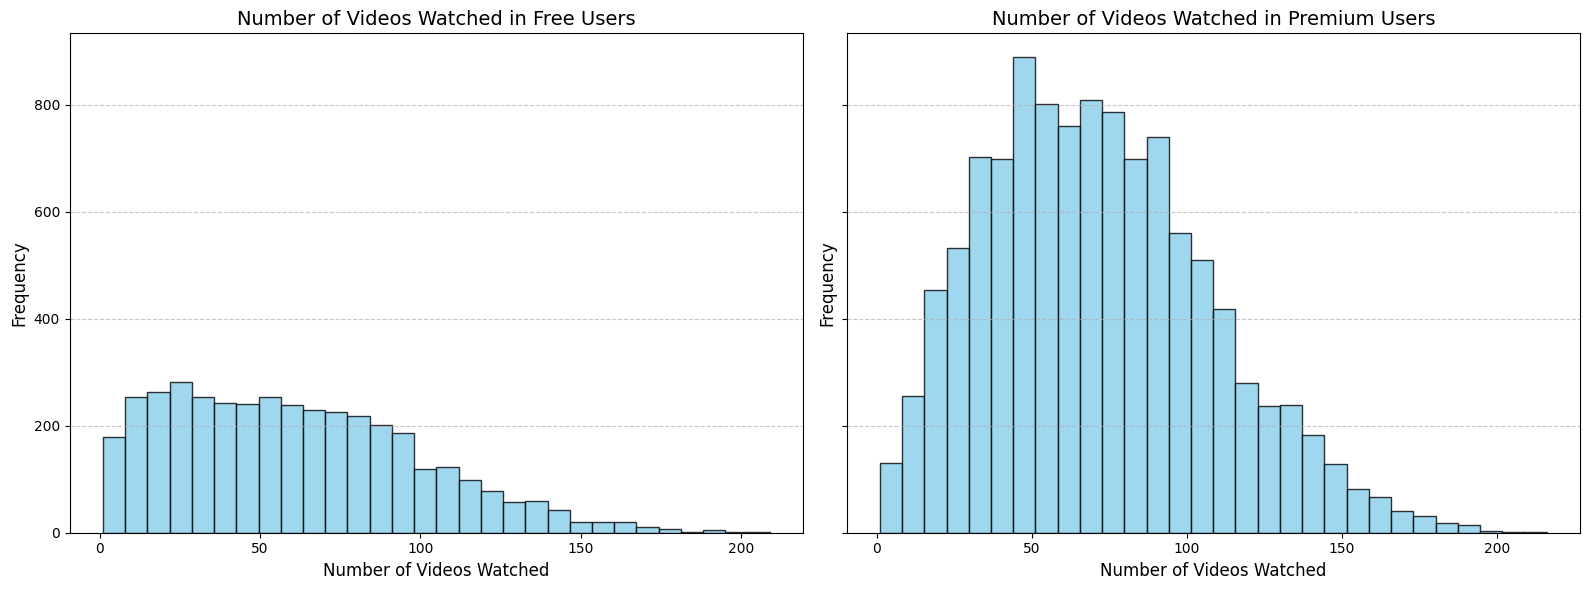

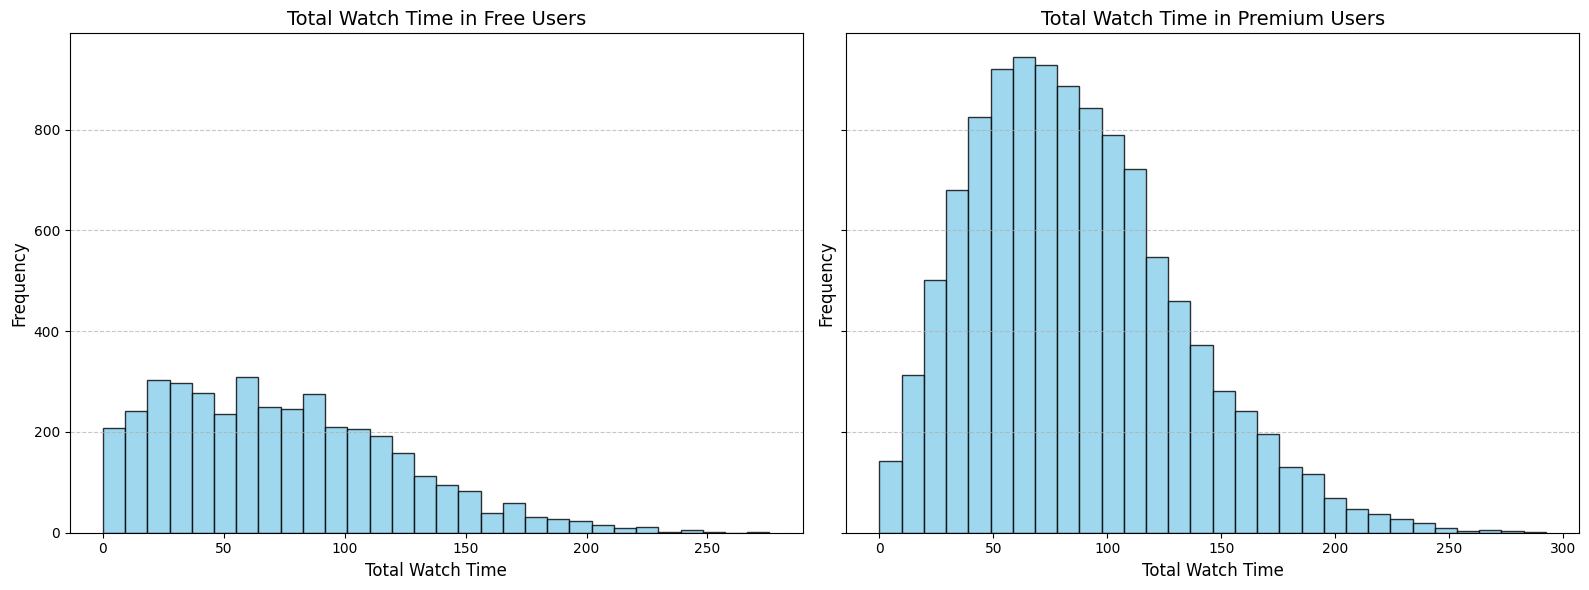

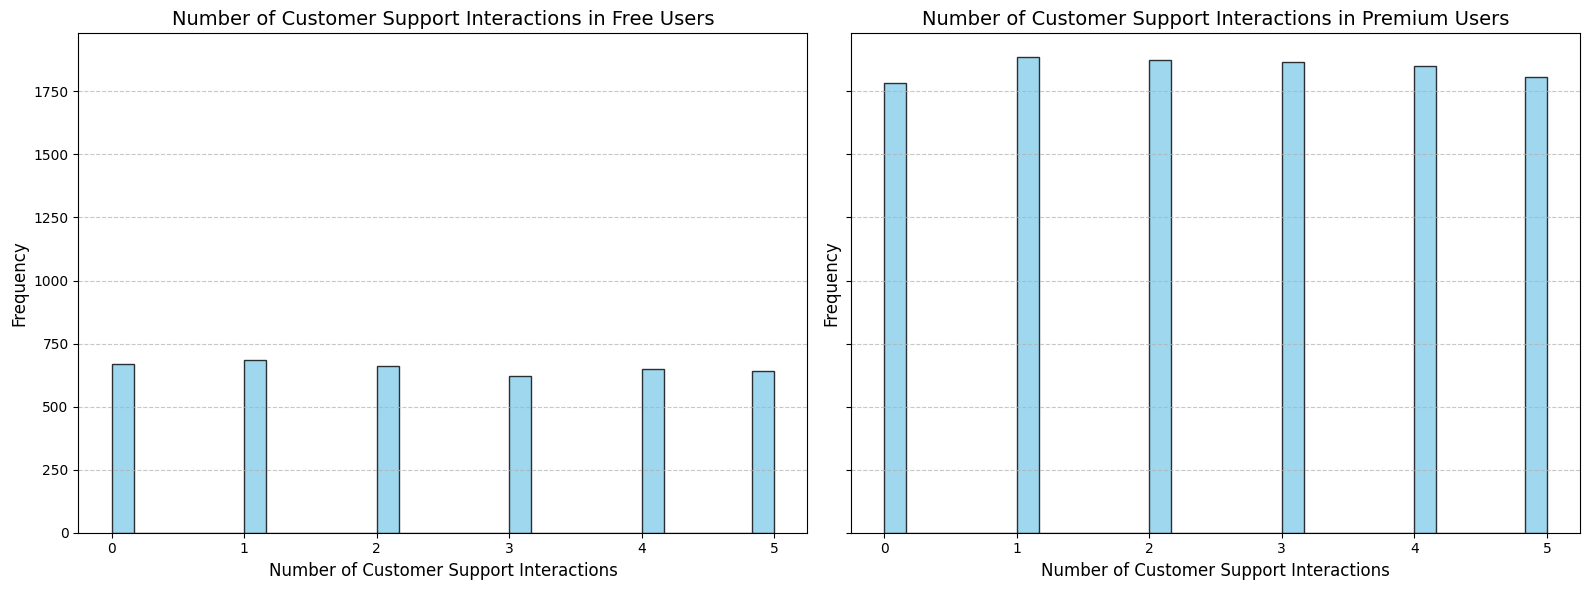

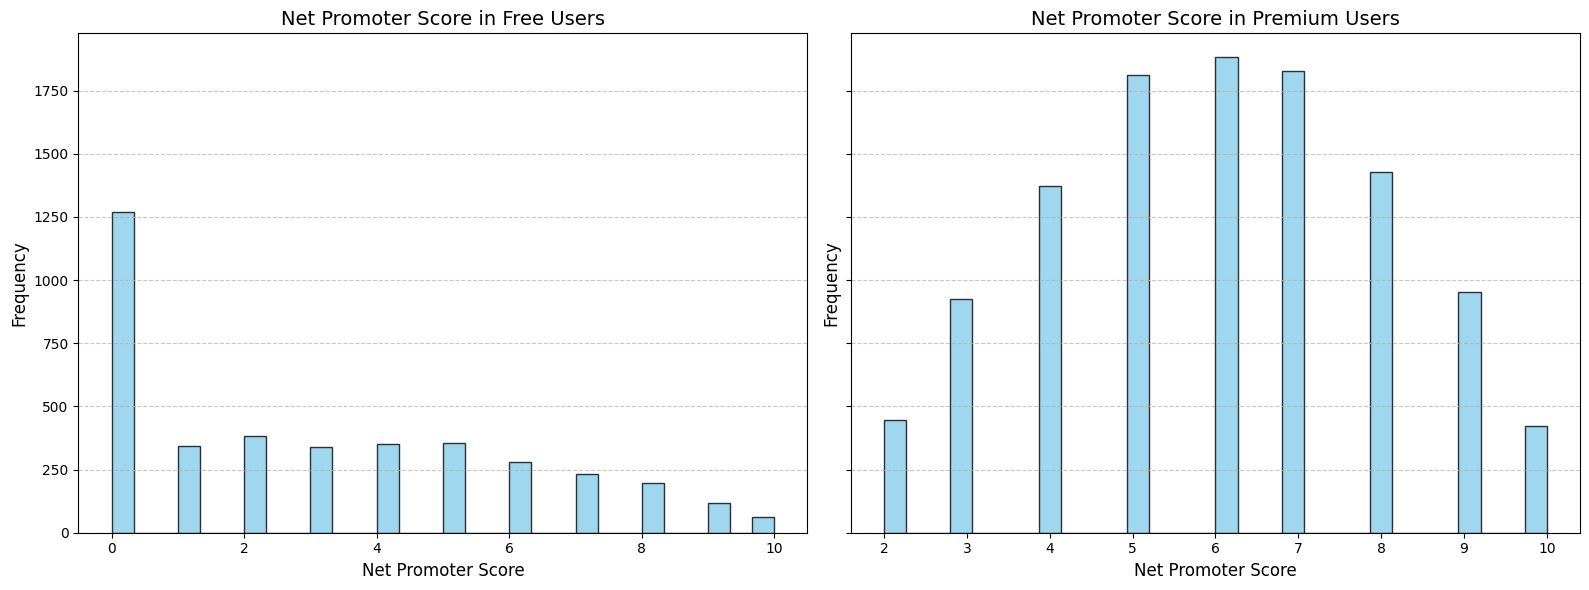

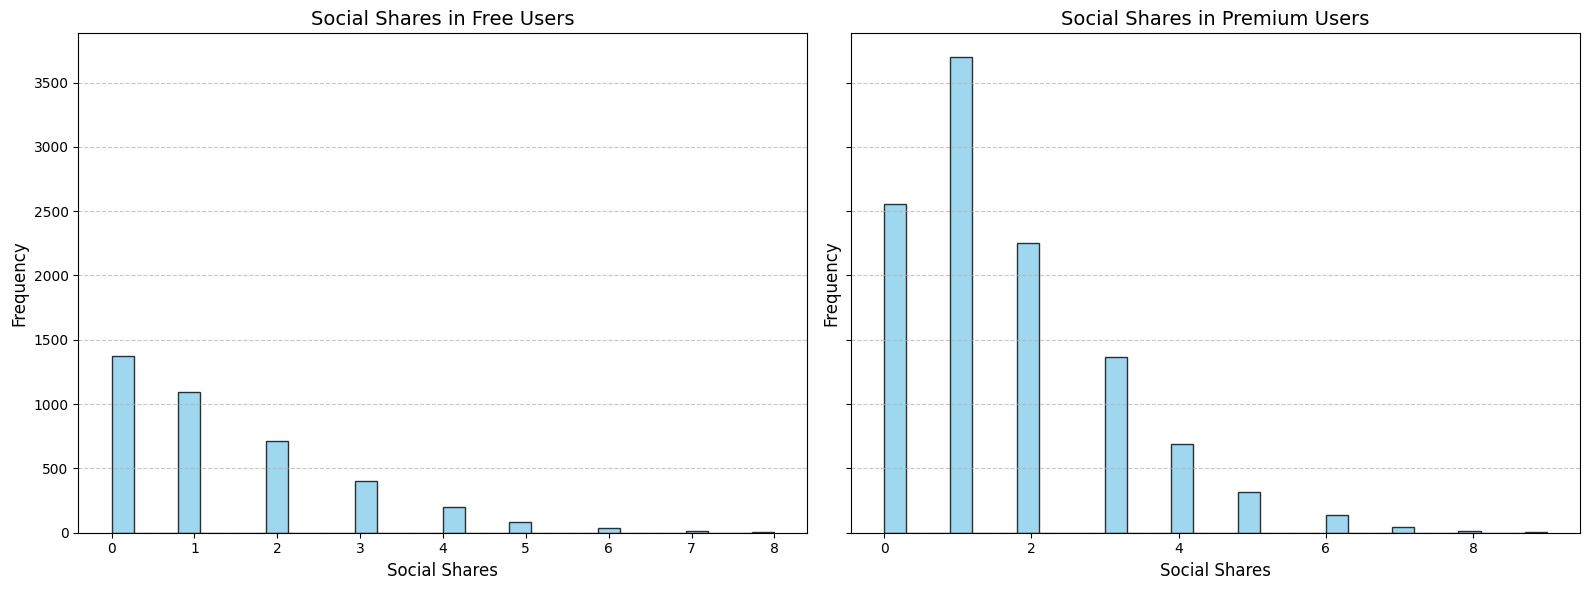

In [29]:
import matplotlib.pyplot as plt

def plot_histogram(ax, column, bins=30, title=None, xlabel=None, ylabel='Frequency'):
    ax.hist(column, bins=bins, color='skyblue', edgecolor='black', alpha=0.8)
    ax.set_title(title if title else f'Histogram of {column.name}', fontsize=14)
    ax.set_xlabel(xlabel if xlabel else column.name, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Loop through numerical columns and plot histograms side by side
for column_name in df.select_dtypes(include=['number']).drop(columns=['Days to Premium']).columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    
    # Free Users
    plot_histogram(axes[0], df[df['Current Subscription Status'] == 'Free'][column_name],
                   title=f'{column_name} in Free Users')
    
    # Premium Users
    plot_histogram(axes[1], df[df['Current Subscription Status'] == 'Premium'][column_name],
                   title=f'{column_name} in Premium Users')
    
    plt.tight_layout()
    plt.show()


### Insights from the Charts:

#### 1. **Number of Videos Watched:**
   - **Free Users (Left Chart):**
     - The distribution is skewed to the right, with most users watching a smaller number of videos (0–50 range). 
     - Few users watch over 100 videos, indicating low engagement among many(near 4000) free users.
   - **Premium Users (Right Chart):**
     - The distribution is right-skewed but compared to the free users It's more balanced and centered around 50–100 videos, with a peak at around 40-50 videos watched.
     - Premium users show higher engagement.

#### 2. **Net Promoter Score (NPS):**
   - **Free Users (Left Chart):**
     - A significant portion of free users have an NPS of 0, suggesting a majority of them are not likely to recommend the service.
     - The NPS distribution is flat beyond 0, with relatively low scores overall.
   - **Premium Users (Right Chart):**
     - Premium users have a higher NPS, with peaks around scores of 5–7, indicating greater satisfaction and likelihood of recommendation.
     - Premium users NPS is at least 2, which further supports the idea that premium users are more satisfied..


### **Conversion Strategy:**
   - The stark difference in video engagement and NPS between free and premium users suggests that efforts to improve engagement in free users could increase conversion rates.
   - Highlighting the benefits of premium (e.g., more content, better satisfaction) might encourage free users to upgrade.
   

<br>

---
<br>


### Decisions for Further Analysis

From the correlation matrix calculated above and the charts, here are some decisions I made to improve further analyses:

1. **Exclude 'Number of Videos Watched'**:
   - The correlation between 'Number of Videos Watched' and 'Total Watch Time' is 0.94.
   - 'Total Watch Time' is more continuous and descriptive, making it a better choice for analysis.

2. **Winsorize 'Social Shares' and 'Total Watch Time'**:
   - Both are right-skewed and may have outliers with large values.
   - Winsorizing these columns will mitigate the impact of outliers on the logistic regression analysis as i want to use it for finding users who are more likely to convert.


<br>

3. **Use Median over Mean**: Numerical fields have skew in their distribution. Hence, the median is preferred over the mean to provide a more accurate central tendency.


In [30]:
import numpy as np

limit_percentage = 0.99
cols_to_winsorize = ['Total Watch Time', 'Social Shares']

upper_limit = df[cols_to_winsorize].quantile(limit_percentage)

df[cols_to_winsorize] = np.clip(df[cols_to_winsorize], None, upper_limit, axis=1)

<Axes: xlabel='Days to Premium', ylabel='Frequency'>

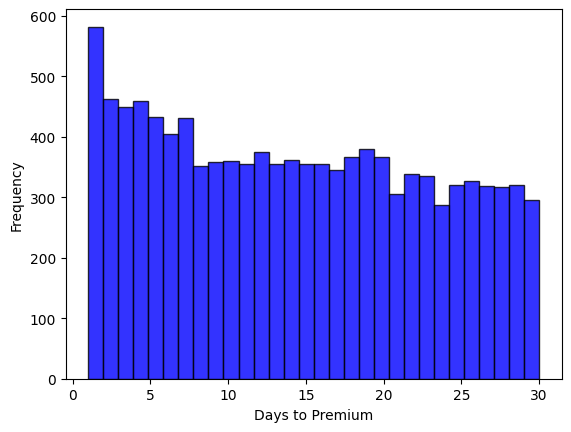

In [31]:
days_to_premium = df['Days to Premium']
days_to_premium.plot(kind='hist', color='blue', edgecolor='black', alpha=0.8, bins=30, xlabel='Days to Premium')

### Decreasing Trend of Premium Users Over Time

This graph shows the decreasing trend of premium users as days pass after registration. (The frequency of conversion in early days is approximately 2 times more than last days.)

**Insight:**
- Earlier interventions are more likely to increase the conversion rate.


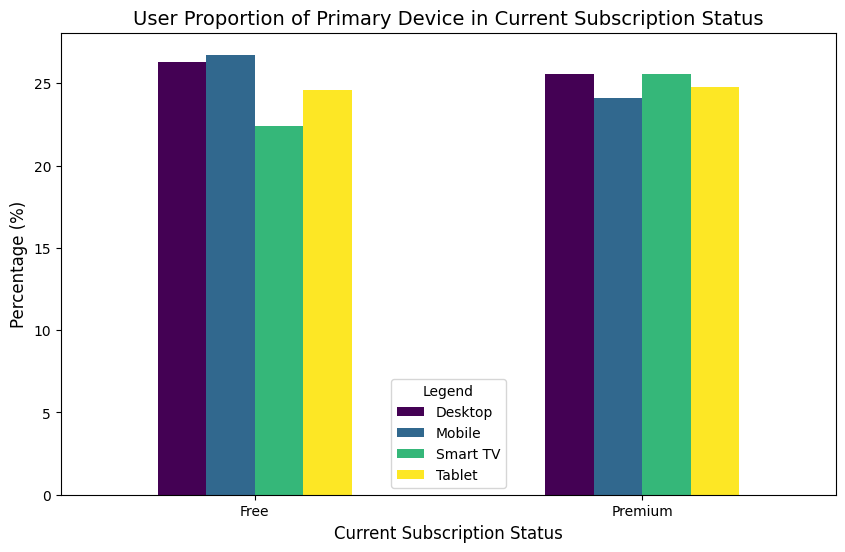

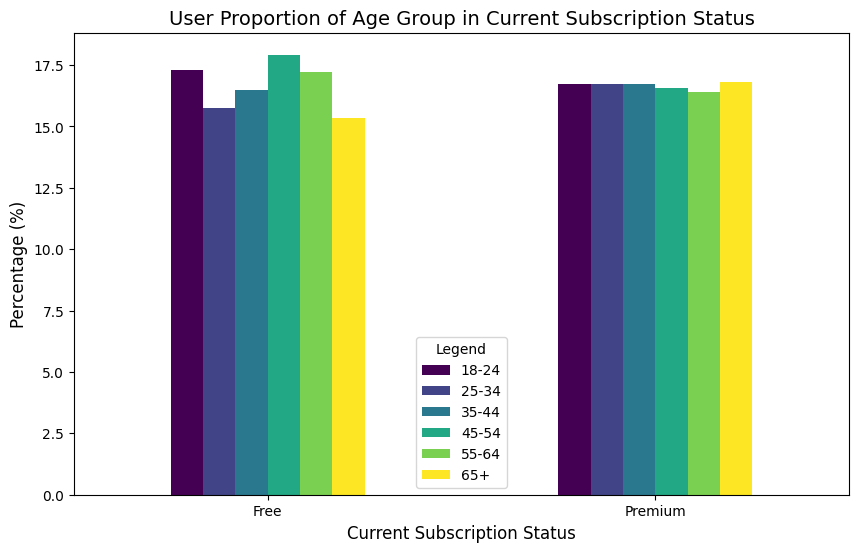

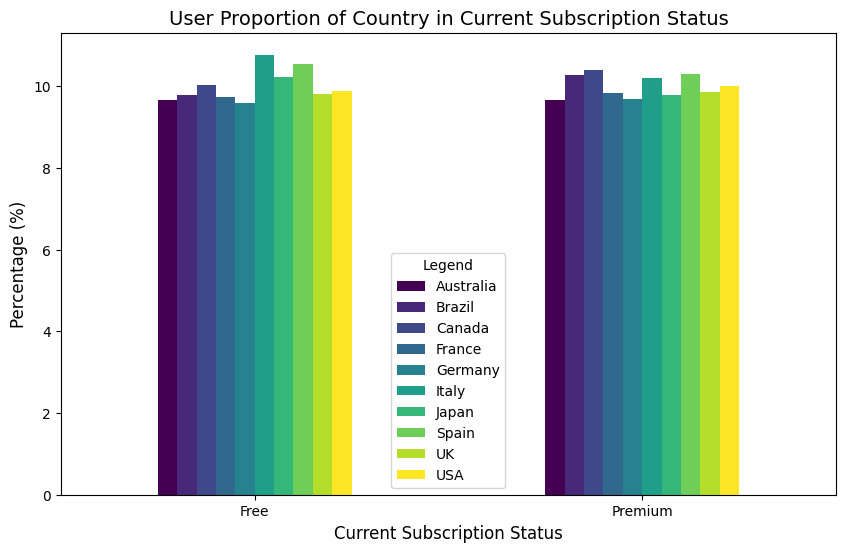

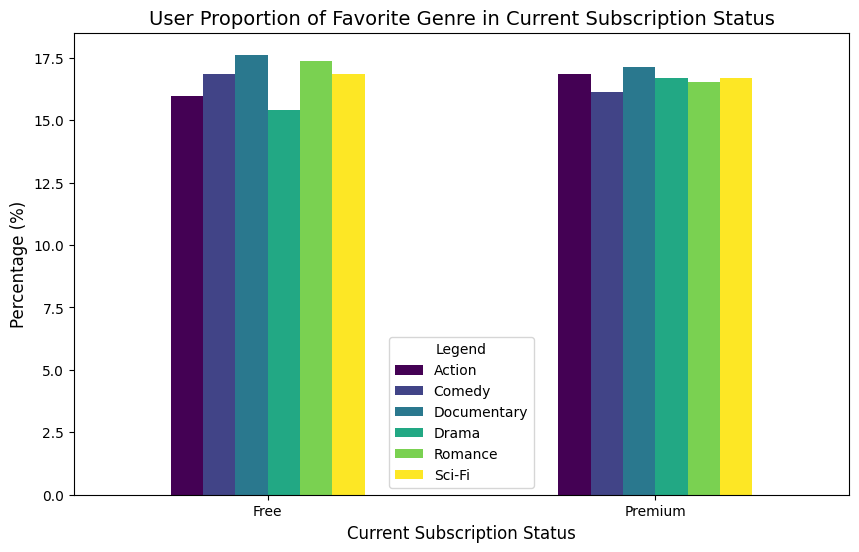

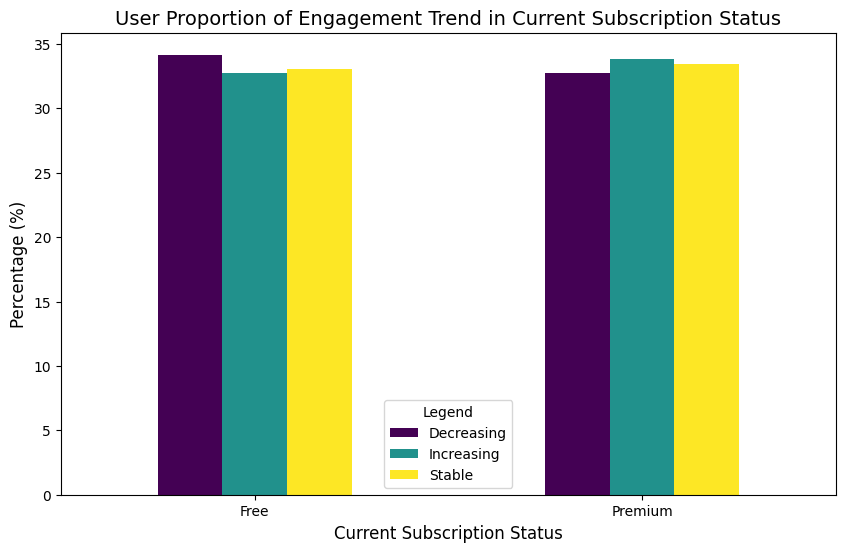

In [32]:
def plot_barchart(pivot_table, title=None, xlabel=None, ylabel='Percentage (%)'):
    
    # Plot the pivot table
    pivot_table.plot(kind='bar', figsize=(10, 6), colormap='viridis')

    # Add labels and title
    plt.title(title if title else 'Percentages Bar Chart' , fontsize=14)
    plt.xlabel(xlabel=xlabel if xlabel else 'Grouped By', fontsize=12)
    plt.ylabel(ylabel if ylabel else 'Percentage (%)', fontsize=12)
    
    plt.xticks(rotation=0)
    plt.legend(title='Legend', fontsize=10)

def group_categorical_proportion(group_by_column, cat_column):
    
    proportion_series = df.groupby(group_by_column)[cat_column].value_counts(normalize=True)
    
    proportion_df = proportion_series.mul(100).reset_index(name='proportions')
    
    pivot_proportions = proportion_df.pivot(index=group_by_column, columns=cat_column, values='proportions')
    return pivot_proportions


group_by_column = 'Current Subscription Status'
for cat_column in df.drop(columns=[group_by_column]).select_dtypes(include=['object', 'category']):
    result = group_categorical_proportion(group_by_column, cat_column)
    plot_barchart(result,
                  title=f'User Proportion of {cat_column} in {group_by_column}',
                  xlabel=group_by_column,
                  )              

### **Analysis of the First Chart (Primary Device by Subscription Status):**
- **Key Observation:** 
  - Both Free and Premium users show similar proportions across device categories. 
  - Desktop and Tablet usage is slightly higher compared to Smart TVs, while Mobile use is also significant.
- **Insights:** 
  - There isn't a strong difference in device preference between Free and Premium users, suggesting device type may not significantly influence subscription conversion.

---

### **Analysis of the Second Chart (Age Group by Subscription Status):**
- **Key Observation:** 
  - The age group distributions are quite uniform between Premium users.
  - 18-24 and 45-54 age groups in Free users are more standout. about younger group we can inferr that they may have less income and they are less likely to convert.
- **Insights:** 
  - Age group does not seem to heavily influence subscription behavior, But in Free users the peak is in the 18-24 and 45-54 ages.

---

### **Overall Suggestion:**
These two charts like the other charts do not show significant differentiation between Free and Premium users. Additional factors (e.g., user engagement) may provide more actionable insights for improving conversion rates.

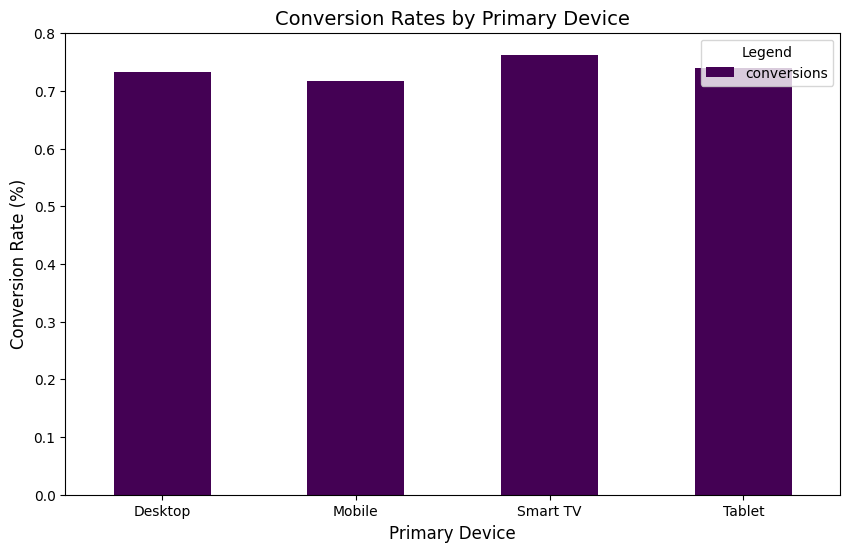

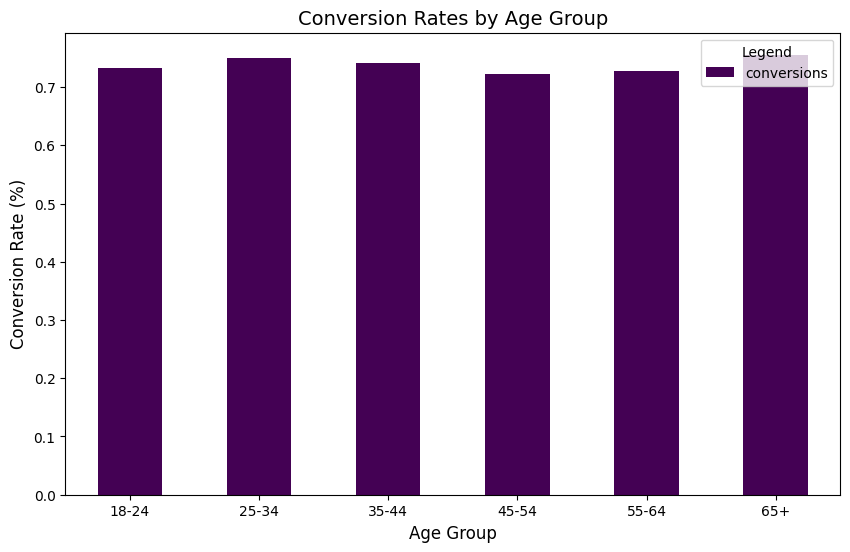

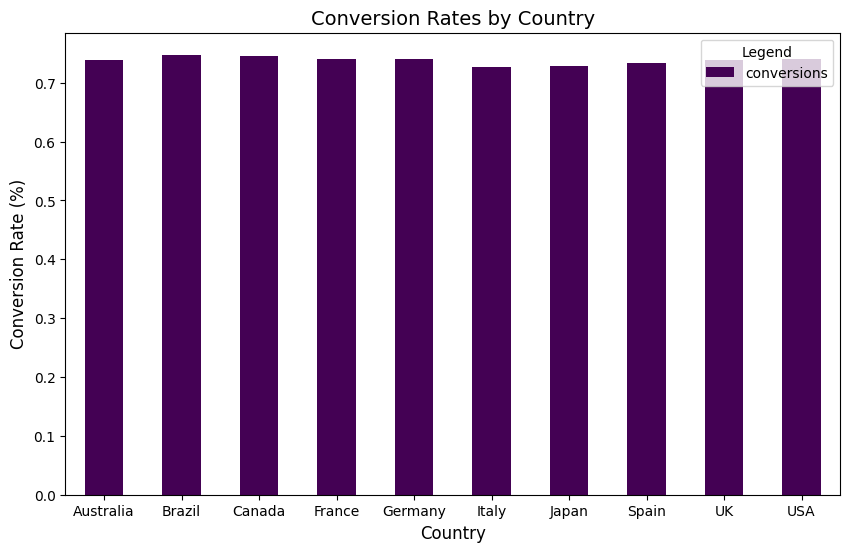

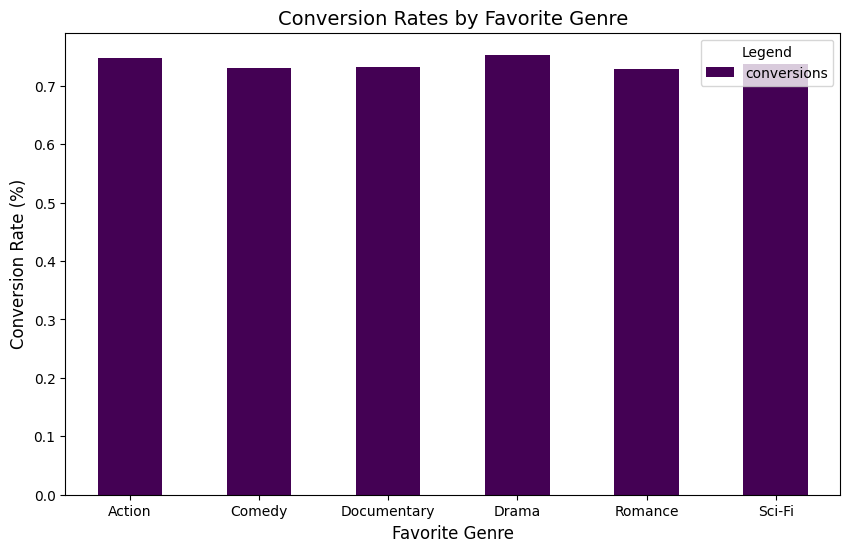

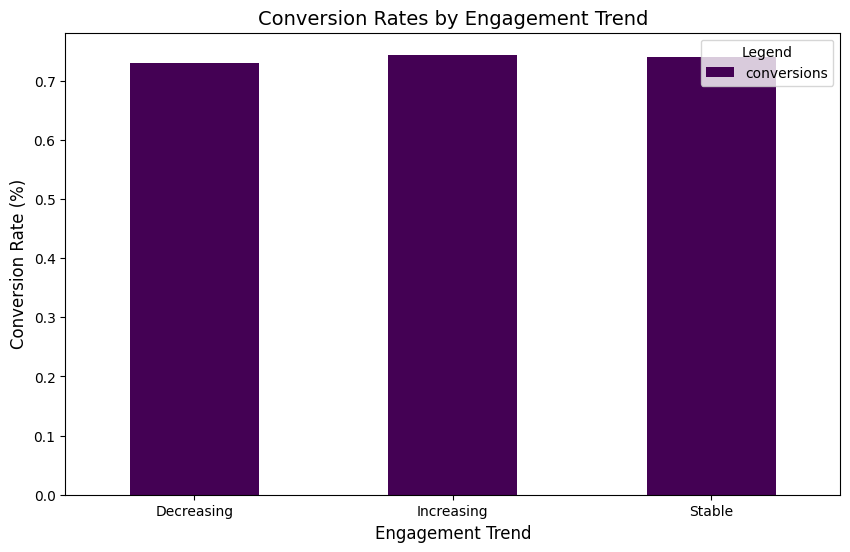

In [33]:
def group_categorical_conversion(group_by_column, subs_status='Current Subscription Status'):
    
    conversions = df.groupby(group_by_column).agg(conversions=(subs_status, lambda x: sum(x == 'Premium') / x.count()))
    
    return conversions
    
    
for column in df.drop(columns='Current Subscription Status').select_dtypes(include=['object', 'category']):
    
    conversion_rates = group_categorical_conversion(column)
    plot_barchart(conversion_rates, title=f'Conversion Rates by {column}', xlabel=column, ylabel='Conversion Rate (%)')

### Conversion Rate Charts Analysis

In the conversion rate charts, the results are not significantly different. 

**Objective:**
- The goal of these charts, along with previous ones, was to assess the user's probability of being premium based on their categorical group (e.g., Primary Device: Tablet).

**Conditional Probability Insight:**
- By analyzing these charts, we can infer the likelihood of a user being a premium subscriber if they belong to specific categorical groups. This helps in identifying key segments where targeted interventions can improve the conversion rate.

<br>

---

### **Analyze the Key Characteristics of Both Free and Premium Users**.
- Start by the users **Engagement Factors Grouped** by each categorical group of both subscription status.

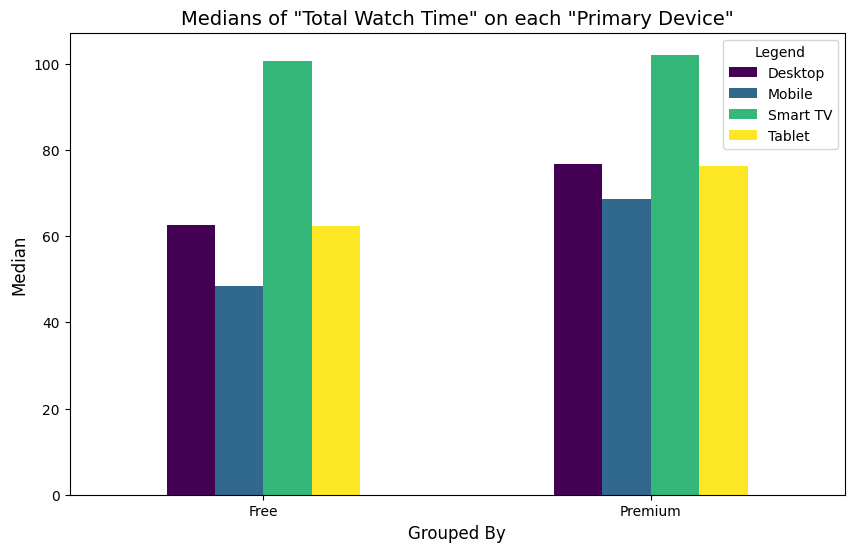

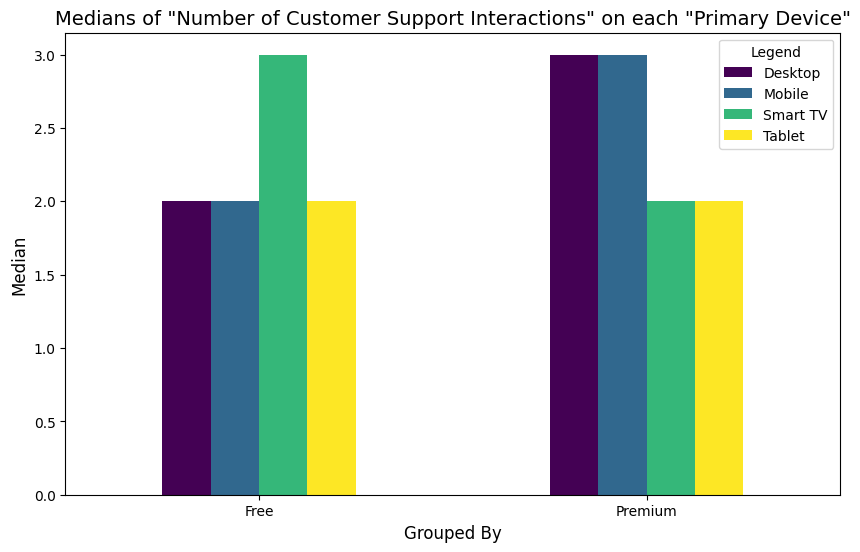

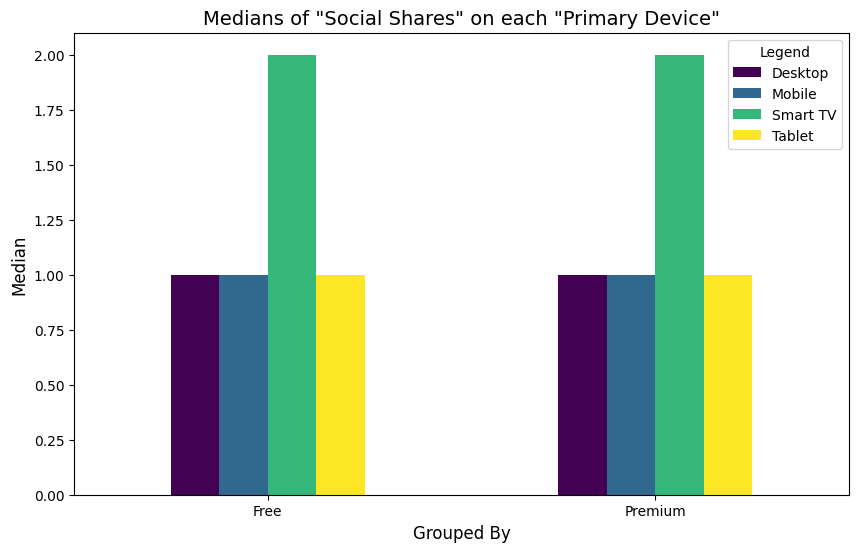

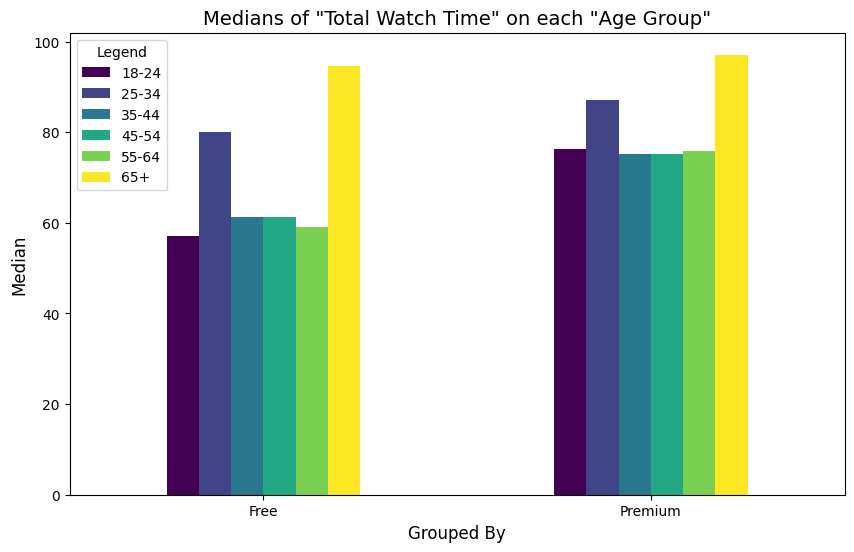

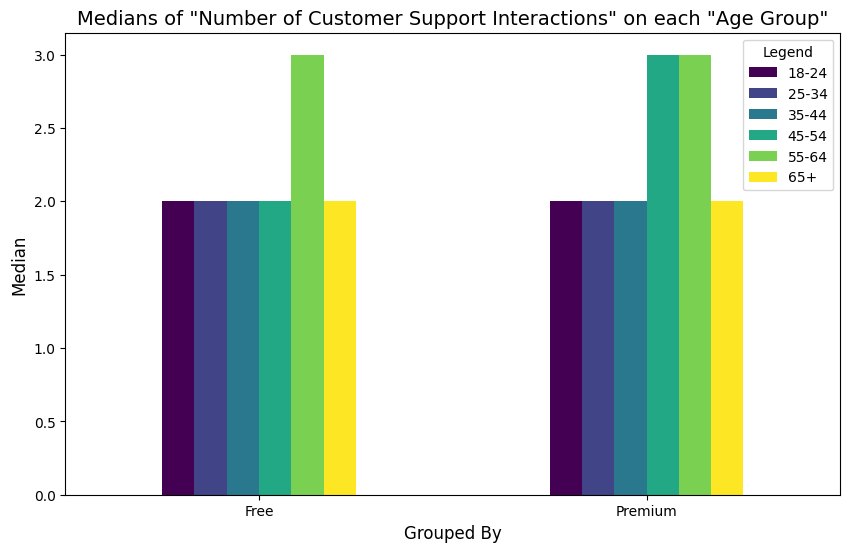

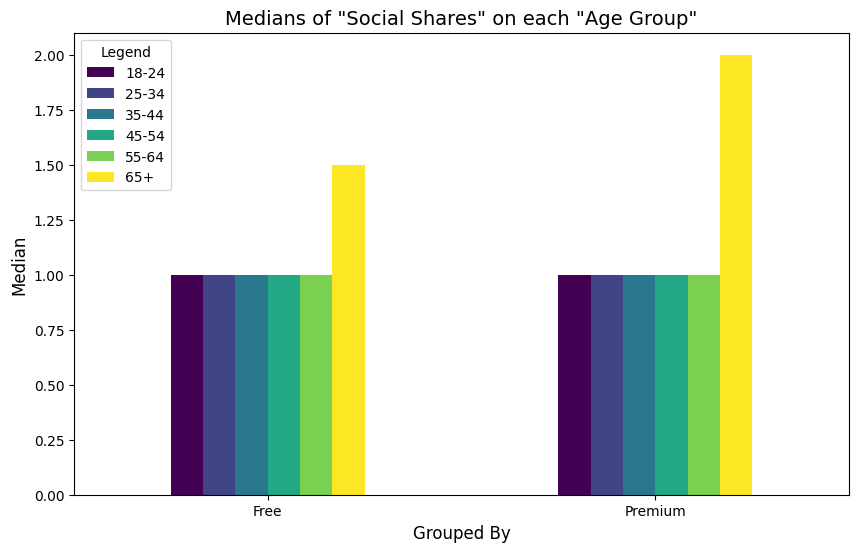

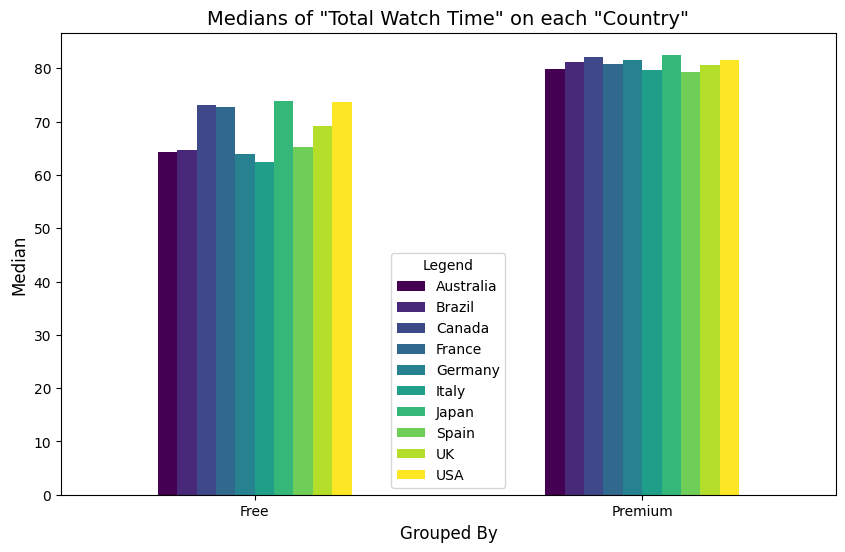

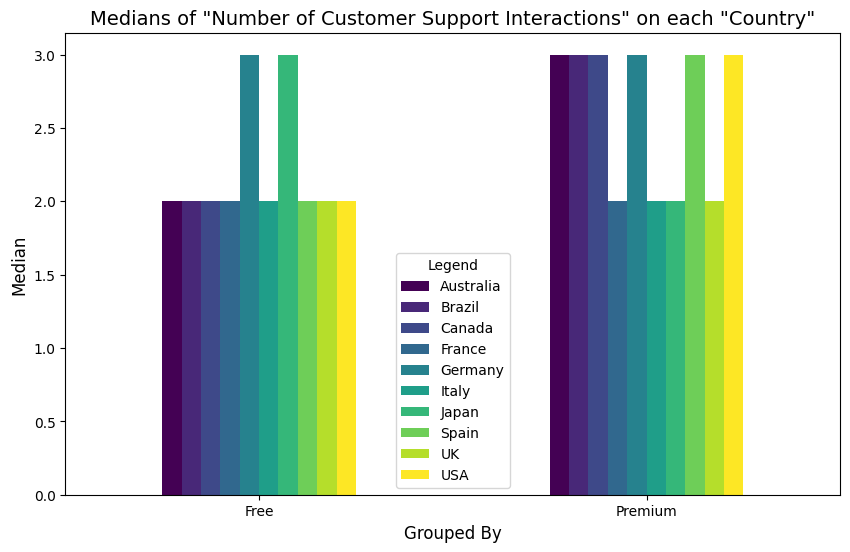

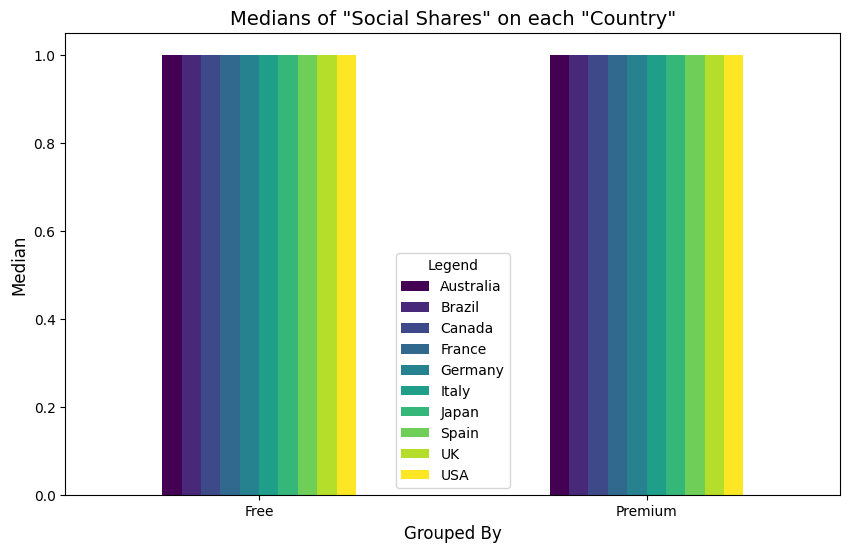

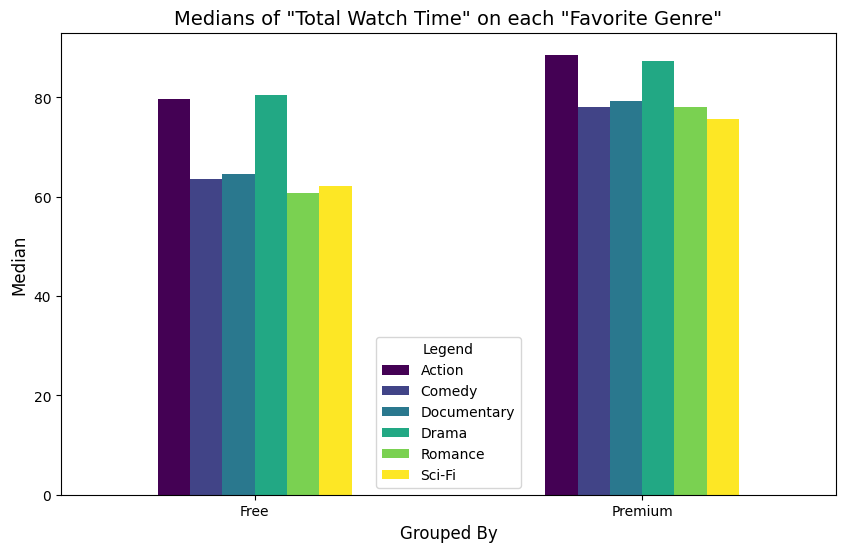

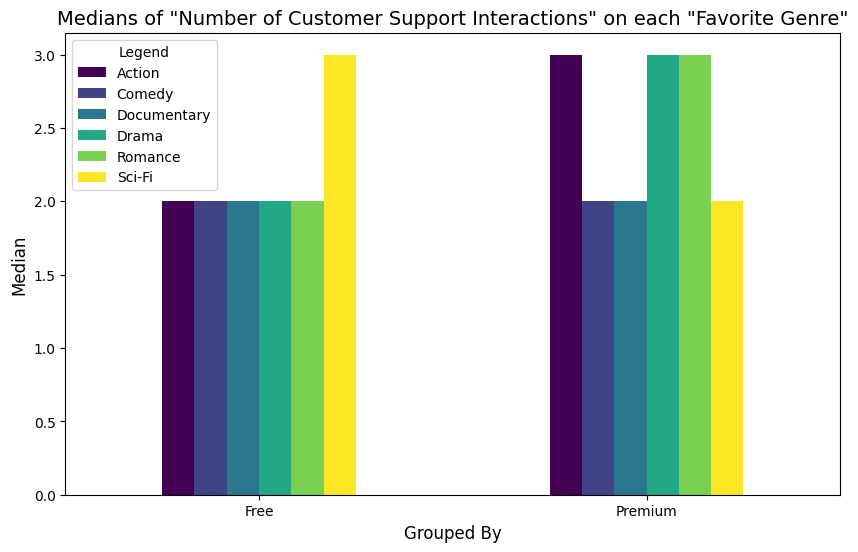

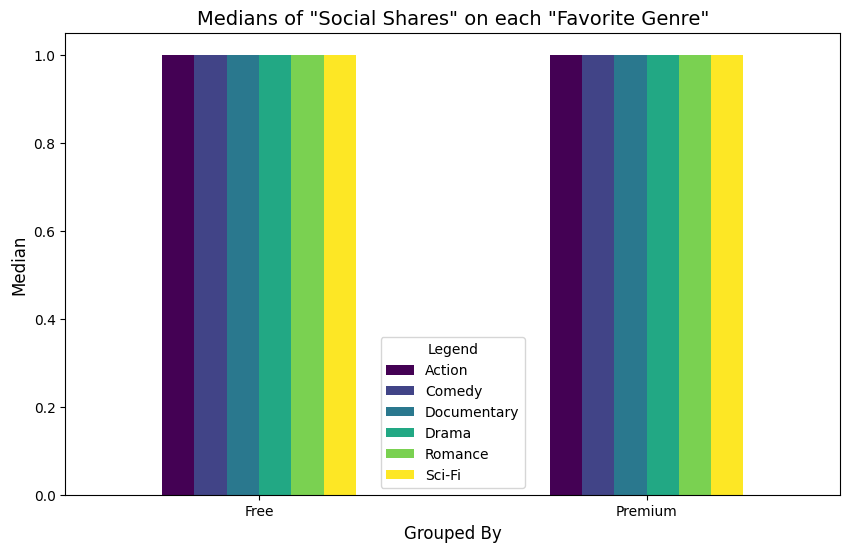

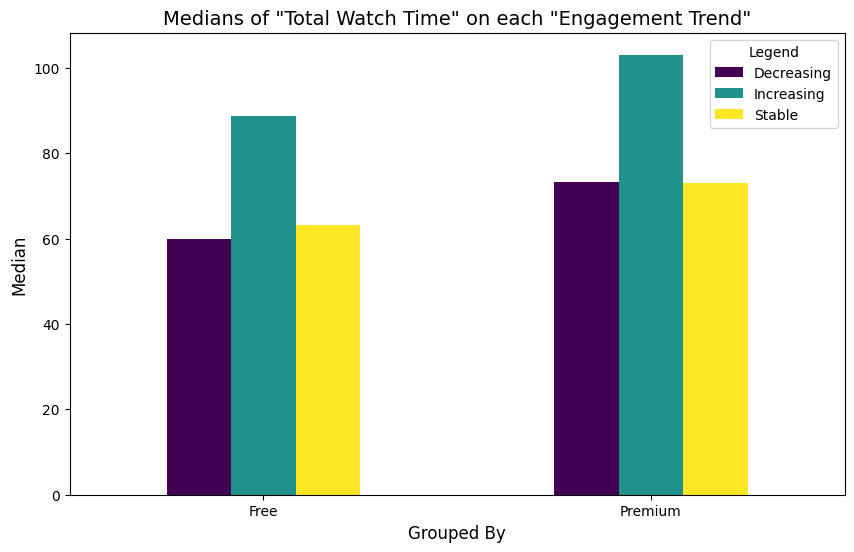

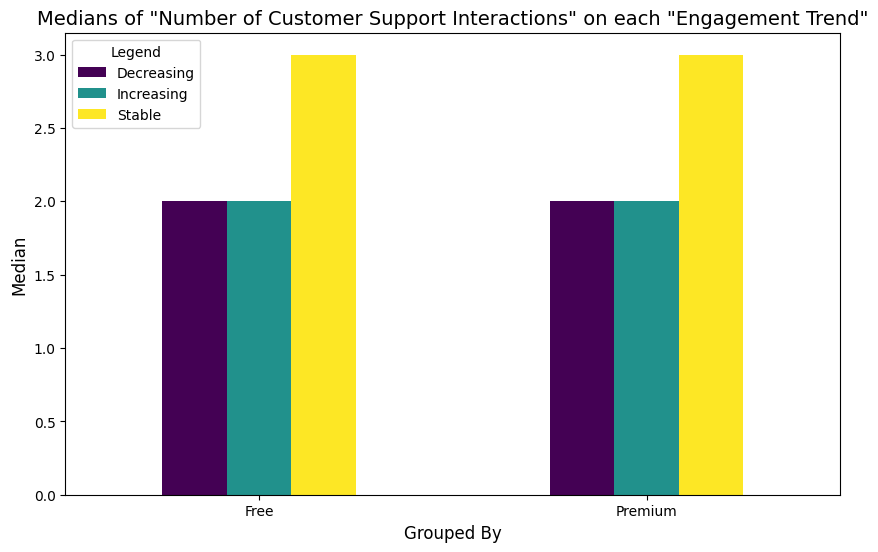

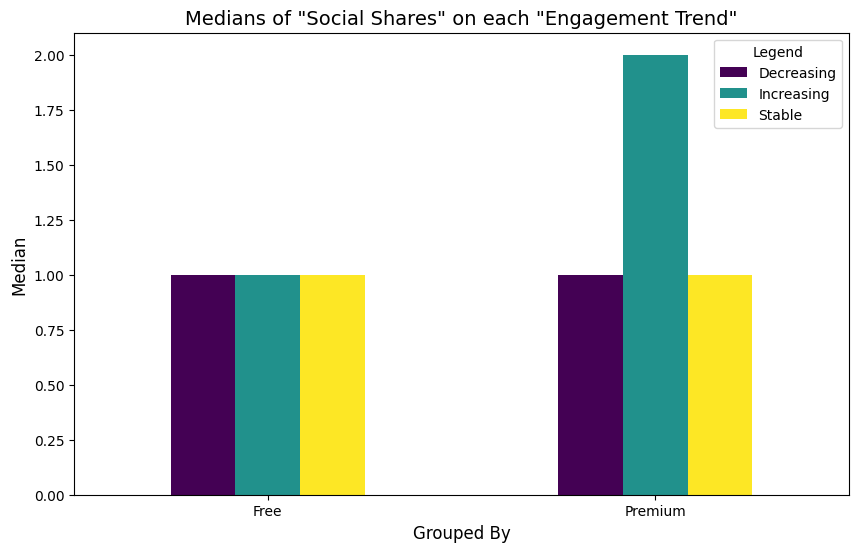

In [34]:
def group_numerical_median(first_level_category, second_level_category, agg_column):
    
    grouped = df.groupby([first_level_category, second_level_category]).agg(median=(agg_column, 'median'))

    pivot_table = grouped.reset_index().pivot(index=first_level_category,
                columns=second_level_category,
                values='median')

    return pivot_table


first_level_category = 'Current Subscription Status'
second_level_category = ['Total Watch Time', 'Number of Customer Support Interactions', 'Social Shares']

for column in df.drop(columns=first_level_category).select_dtypes(include=['object']):
    for agg_column in df[second_level_category]:
        
        pivot_table = group_numerical_median(first_level_category=first_level_category, second_level_category=column, agg_column=agg_column)
        plot_barchart(pivot_table, title=f'Medians of "{agg_column}" on each "{column}"', ylabel='Median')
        


### Insights by Primary Device

- **Smart TV**:
  - Has more total watch time in both groups, indicating higher engagement.
  - Free users who use Smart TVs tend to have more customer support interactions.
  - Premium users, on the other hand, have more support interactions on Desktop and Mobile devices.

- **Social Shares**:
  - Both tiers show similar social share behavior, but Smart TV users are more likely to share videos.

### Insights by Age Group

- **25-34 and 65+ Age Groups**:
  - These groups have more total watch time, with the difference being more noticeable among free users.
  - Social shares in the 65+ age group are significantly higher than others.
    - In Premium users, the median of social shares is 2.
    - In Free users, the median is 1.5.

### Insights by Country

- **Japan**:
  - Shows higher engagement compared to other countries.

### Insights by Favorite Genres

- **Action and Drama**:
  - Have more watch time in both groups, with a more noticeable difference among free users.

### Engagement Trend Insights
  
- **Customer Support Interactions**:
  - The number of support interactions is the same in both groups, with stable users having more support interactions.

- **Social Shares**:
  - Free users: Social shares are consistent across all engagement trends.
  - Premium users: Increasing users have more social shares.



## A/B Testing:
---

### Data Preprocessing for Logistic Regression

1. **Numerical Features**: Numerical Featues are scaled using `StandardScaler` to ensure no single feature dominates due to its scale.<br><br>
2. **Categorical Features**: Categorical Features are converted to dummy variables for categorical encoding.
3. **Feature Combination**: Scaled numerical features and encoded categorical features are combined into a single DataFrame `X`.
4. **Target Variable**: 'Current Subscription Status' is converted into a binary target variable `y`, indicating if the user is a Premium subscriber.

This preprocessing ensures that the features are properly scaled and encoded for the machine learning model.


In [35]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Total Watch Time', 'Number of Customer Support Interactions', 'Net Promoter Score', 'Social Shares'] # Numeber of Videos Watched is highly correlated with Total Watch Time
categorical_features = ['Age Group', 'Primary Device', 'Favorite Genre', 'Country','Engagement Trend']

scaler = StandardScaler()
X_numerical = scaler.fit_transform(df[numerical_features]) # Scale all numerical features for prevention of dominating low scale features by high scale ones

X_categorical = pd.get_dummies(df[categorical_features], drop_first=True)

X_numerical = pd.DataFrame(X_numerical, columns=numerical_features, index=df.index)
X = pd.concat([X_numerical, X_categorical], axis=1)

y = (df['Current Subscription Status'] == 'Premium').astype(int)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)



y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.61      0.76      1189
           1       0.88      1.00      0.93      3311

    accuracy                           0.90      4500
   macro avg       0.94      0.81      0.85      4500
weighted avg       0.91      0.90      0.89      4500



In [37]:
import numpy as np

def coef_impact(coef):
    if coef > 0:
        return 'Positive'
    elif coef < 0:
        return 'Negative'
    else:
        return 'None'

importance = pd.DataFrame({'Feature': X.columns,
                           'Impact': [coef_impact(coef) for coef in logistic_model.coef_[0]], # The first element of logistic_model_coef is the coefficients related to True labels (Premium)
                           'Coefficient': np.abs(logistic_model.coef_[0])})
importance = importance.sort_values(by='Coefficient', ascending=False)
importance.head()


,Feature,Impact,Coefficient
2,Net Promoter Score,Positive,2.386201
1,Number of Customer Support Interactions,Positive,1.506325
0,Total Watch Time,Positive,0.293073
18,Country_Canada,Positive,0.214861
19,Country_France,Positive,0.161987


### Analysis of Top Coefficients

- **Net Promoter Score**: Positive impact; users with higher NPS are more likely to be premium subscribers.
- **Number of Customer Support Interactions**: Positive impact; higher interactions with support correlate with premium subscription.
- **Total Watch Time**: Positive impact; more watch time increases the likelihood of being premium.
- **Country**:
  - **Canada** and **France**: Positive impact; users from these countries are more likely to be premium subscribers.

These insights highlight key factors influencing premium subscription status.


In [38]:
import pandas as pd

# Filter free users and create a copy to avoid unwanted changes
free_users = df[df['Current Subscription Status'] == 'Free'].copy()

# Transform numerical features (on the previous scaler fitted from whole dataset)
X_numerical = scaler.transform(free_users[numerical_features])

# One-Hot endocing on categorical columns
X_categorical = pd.get_dummies(free_users[categorical_features], drop_first=True)

# Convert to DataFrame
X_numerical = pd.DataFrame(X_numerical, columns=numerical_features, index=free_users.index)

# Concatenate numerical and categorical features
X = pd.concat([X_numerical, X_categorical], axis=1)

# Predict probabilities of being premium (The second value of each element is the probability of being Premium)
preds_of_being_premium = logistic_model.predict_proba(X)[:, 1]

# Use .loc to avoid SettingWithCopyWarning
free_users.loc[:, 'Conversion Probability'] = preds_of_being_premium

free_users[['Conversion Probability']]

,Conversion Probability
User ID,
1009,0.918086
1015,0.188441
1016,0.013097
1019,0.010163
1021,0.908822
...,...
15992,0.508630
15994,0.053350
15995,0.924060


In [39]:
%pip install statsmodels

### Sample Size Calculation for A/B Testing (This part is implemented using chatGPT)

The following code calculates the required sample size for an A/B test with the specified parameters:

- **Baseline Conversion Rate**: (60.9%)  (Calculated from daily_conversion_analysis.ipynb)
- **Target Conversion Rate**: (48.1%) (10% improvement from baseline)
- **Significance Level** (alpha: 0.05) (95% confidence level)
- **Power**: 80% probability of detecting the effect if it exists

The process involves:
1. Calculating the effect size using `proportion_effectsize`, which determines the standardized difference between the baseline and target rates.
2. Determining the required sample size per group using `zt_ind_solve_power`.



In [40]:
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import zt_ind_solve_power
from math import ceil

# Define parameters

baseline_rate = 0.609 # Calculated from daily_conversion_analysis.ipynb
effect = 0.10 # Arbitrary
target_rate = baseline_rate + effect

alpha = 0.05
power = 0.8

# Effect size calculation (Cohen's h) based on proportions
effect_size = proportion_effectsize(baseline_rate, target_rate)

# Calculate the required sample size per group
sample_size_per_group = ceil(zt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided'))

# Total sample size (both groups)
total_sample_size = 2 * sample_size_per_group

print(f'Each Group Size: {sample_size_per_group}\nTotal Sample Size: {total_sample_size}')


Each Group Size: 351
Total Sample Size: 702


### User Selection Criteria for A/B Testing

To optimize the effectiveness of our A/B testing, we prioritize user selection based on two main criteria:

1. **Recent Registration**:
   - **Rationale**: Users registered within the last 30 days are likely to decide whether the free features meet their needs within this period.
   - **Implementation**: We filter users whose registration date falls within the last 30 days from the most recent date in our dataset. We calculate the days passed from registration and filter users who registered within the last 30 days.

2. **Conversion Probability**:
   - **Rationale**: Our model predicts the probability of users converting to premium, indicating how close they are to becoming premium users. This helps in identifying the most likely candidates for conversion.
   - **Implementation**: We sort the filtered users by their conversion probability in descending order. For the early days, the conversion rate is typically higher, so we prioritize these users. We then select the top users based on the required sample size.

In [41]:
import pandas as pd

# Calculate the most recent date in the dataset
most_recent_date = free_users.select_dtypes(include='datetime').max().max()

# Calculate the days passed from registration for each user and cast the result to int
free_users.loc[:, 'Days Passed From Registration'] = (most_recent_date - free_users['Registration Date']).dt.days.astype(int)

# Filter the users who registered within the last 30 days
last_30days_users = free_users[free_users['Days Passed From Registration'] < 30]
ab_testing_users = last_30days_users.sort_values(by=['Days Passed From Registration', 'Conversion Probability'], ascending=[True, False]).head(total_sample_size) # In early days the conversion rate is double
ab_testing_users[['Days Passed From Registration', 'Conversion Probability']]



,Days Passed From Registration,Conversion Probability
User ID,,
14509,0,0.972338
6881,0,0.969663
1598,0,0.944022
1698,0,0.932687
2550,0,0.900887
...,...,...
13868,21,0.610715
11600,21,0.546629
5193,21,0.401539


In [42]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Shuffle the indices of the DataFrame
shuffled_indices = np.random.permutation(len(ab_testing_users))

# Split the shuffled indices into two halves
half_size = len(shuffled_indices) // 2
group_a_indices = shuffled_indices[:half_size]
group_b_indices = shuffled_indices[half_size:]

# Create Group A and Group B DataFrames
group_a = ab_testing_users.iloc[group_a_indices]
group_b = ab_testing_users.iloc[group_b_indices]


# A/B Testing Implementation

### Objective (In One Month A/B Testing)
To assess whether the proposed changes to the A group (treatment group) increase the conversion rate from free trial users to premium users by at least 10% compared to the baseline conversion rate of 38% (Conversion Rate in last month).

### Insights
1. Users are more likely to convert in the first 30 days.
2. Early engagement is critical, as conversion likelihood decreases over time.

## Recommendations for A Group (Treatment Group)

### Features to Implement
1. **Personalized Recommendations**:
   - Use machine learning to suggest content based on user preferences (e.g., favorite genre or primary device).
2. **Enhanced Trial Features**:
   - Provide a preview of premium-only features, such as ad-free content or exclusive shows, during the trial period.
3. **Targeted Notifications**:
   - Send notifications or emails highlighting the benefits of premium subscription, tailored to user behavior (e.g., high watch time users).
4. **Limited-Time Offers**:
   - Introduce limited-time discounts for users who convert to premium within the first 10 days.

### Key Metrics to Track
- Conversion rate: Percentage of users upgrading to premium.
- Engagement metrics: Total watch time, number of interactions with premium features.

## Evaluation Plan
1. **Conversion Rate Comparison**:
   - Calculate conversion rates for both A (treatment) and B (control) groups.
   - Use a one-tailed Z-test to determine statistical significance (H₀: p₁ ≥ p₂, H₁: p₁ < p₂).
2. **Retention Analysis**:
   - Compare engagement trends over the 30-day period for both groups.
3. **Segmentation Analysis**:
   - Evaluate conversion rates across different user segments (e.g., age groups, countries, devices).
4. **ROI (Rate Of Investment) Assessment**:
   - Measure revenue uplift from conversions against the cost of implementing A group features.


## After A/B Testing
1. Analyze test results after the 30-day period to determine whether the changes in A group achieved the desired effect.
2. If successful, implement A group features across the platform (for Free Users).
3. If results are inconclusive or negative, conduct a root cause analysis to identify areas for improvement and iterate on features.
